In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
start = "2012-01-01"
end="2022-12-21"
stock = "GOOG"
data =yf.download(stock , start , end)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1820\260084428.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data =yf.download(stock , start , end)
[*********************100%***********************]  1 of 1 completed


In [51]:
data.reset_index(inplace=True)

In [52]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661095,93.474374,89.895648,92.987272,28298800
2758,2022-12-16,90.323105,91.207845,89.478129,90.661092,48485500


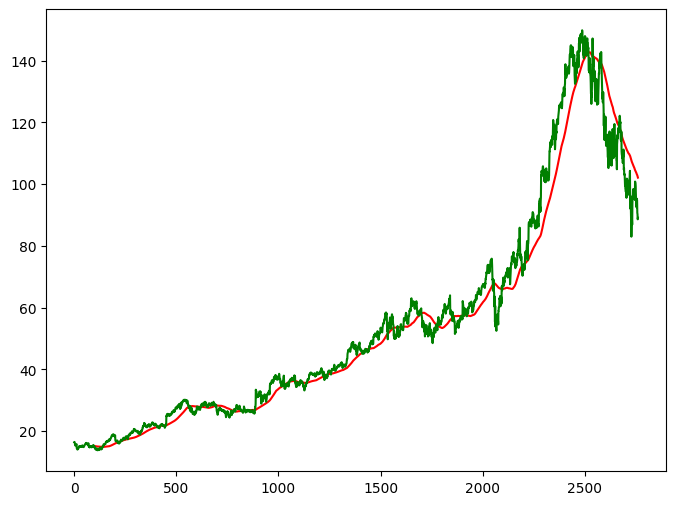

In [53]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days , 'r')
plt.plot(data.Close,"g")
plt.show()

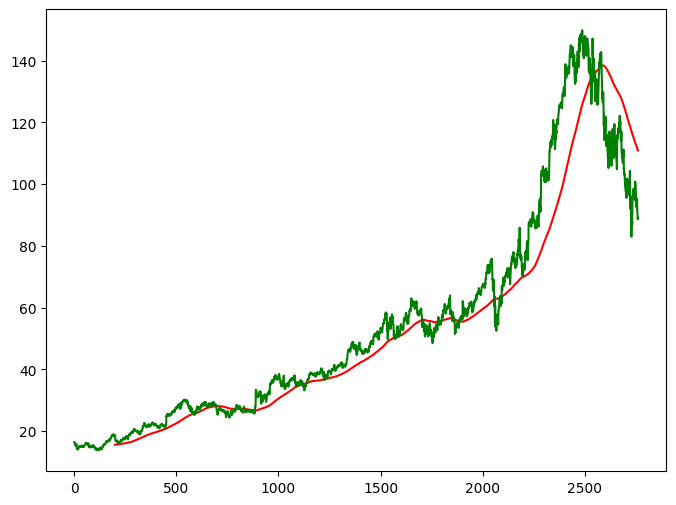

In [54]:
moving_avg_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(moving_avg_200_days , "r")
plt.plot(data.Close , "g")
plt.show()

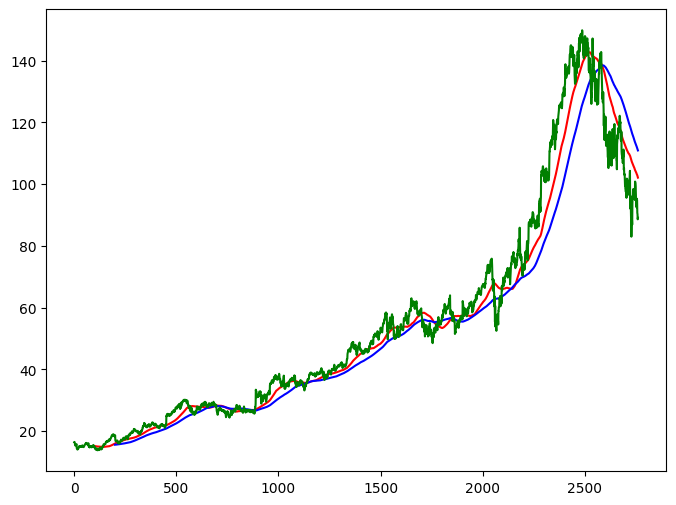

In [55]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,"r")
plt.plot(moving_avg_200_days , "b")
plt.plot(data.Close , 'g')
plt.show()

In [56]:
data.dropna(inplace=True)
data_train = data.Close[ :int(len(data) * 0.8)]
data_test = data.Close[int(len(data) * 0.8) : ]

In [57]:
scaler = MinMaxScaler()
data_train_scale = scaler.fit_transform(data_train)

In [58]:
x = []
y = []
for i in range(100 , data_train_scale.shape[0]):
    x.append(data_train_scale[i-100 : i])
    y.append(data_train_scale[i,0])

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50 , activation= 'relu' , return_sequences=True , input_shape= ((x.shape[1],1))))

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo